In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def gen_data(maxR,iterations):
  """
  Takes in a maximum radius and a number of circles to be generated. 
  It gives 2 arrays: the data for plotting the cirlces and the radii which are used as the labels for training
  
  I just created this to get data to start. It is very slow and needs work to give something more meaningful.
  """
  
  
  circlesOutput =  np.array([])
  radii =  np.array([])
  
  # making the plot as big as the largest radius
  dimension = 2*maxR + 1
  
  # for each circle
  for n in range(iterations):
    circle = np.zeros((dimension,dimension))
    
    radius = np.random.randint(1,maxR+1)
    
    #for each pixel
    for i in range(2*maxR+1):
      for j in range(2*maxR+1):
        
        x = j - maxR
        y = i - maxR
        position = (x**2 + y**2)**(1/2)
        
        #check if the pixel is within the radius
        if position <= radius:
          
          # shade the pixel according to a Gaussian
          circle[i][j] = np.exp((-1/2)*(3*position/maxR)**2)
          
    circlesOutput = np.append(circlesOutput,circle)
    radii = np.append(radii,radius)
 
  circles = circlesOutput.reshape(iterations,dimension**2)
  return circles, radii

In [0]:
#generate data

maxR = 50
iterations = 1000

circleData, radiiLabels = gen_data(maxR,iterations)


radius = 49.0


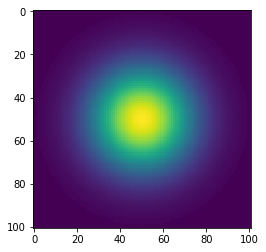

In [36]:
#showing an example circle

display = circleData[5].reshape(2*maxR+1,2*maxR+1)
plt.grid(False)
plt.imshow(display)
print("radius = " + str(radiiLabels[5]))


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

In [0]:
# splitting the data into training and testing data

#taking 90% for training and 90% for testing
split = int(0.9*len(circleData))

train_data = circleData[:split]
train_labels = radiiLabels[:split]

test_data = circleData[split:]
test_labels = radiiLabels[split:]


In [0]:
# simple dense, fully-connected network

model = Sequential([
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(51, activation=tf.nn.softmax)
])


My next goal is to make this a convolutional neural network.

You might notice I did a cheap trick where I have the model classifying the radius by picking from all possible values for the radius. This would be better if it was predicting a value for the radius by calculating a continuous value.**bold text**

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(train_data, train_labels, epochs=20)

Epoch 1/20
900/900 [==============================] - 1s 701us/sample - loss: 1.3335 - acc: 0.6078
Epoch 2/20
900/900 [==============================] - 1s 685us/sample - loss: 1.0894 - acc: 0.6711
Epoch 3/20
900/900 [==============================] - 1s 670us/sample - loss: 0.8816 - acc: 0.7389
Epoch 4/20
900/900 [==============================] - 1s 691us/sample - loss: 0.7503 - acc: 0.7689
Epoch 5/20
900/900 [==============================] - 1s 689us/sample - loss: 0.6723 - acc: 0.8056
Epoch 6/20
900/900 [==============================] - 1s 712us/sample - loss: 0.5377 - acc: 0.8456
Epoch 7/20
900/900 [==============================] - 1s 696us/sample - loss: 0.4736 - acc: 0.8667
Epoch 8/20
900/900 [==============================] - 1s 688us/sample - loss: 0.4184 - acc: 0.8833
Epoch 9/20
900/900 [==============================] - 1s 694us/sample - loss: 0.3715 - acc: 0.8978
Epoch 10/20
900/900 [==============================] - 1s 707us/sample - loss: 0.3412 - acc: 0.9078
Epoch 11/

In [49]:
# should expect an accuracy in the 90's

test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

100/100 [==============================] - 0s 681us/sample - loss: 0.0752 - acc: 0.9900
Test accuracy: 0.99


In [50]:
#test some prediction

predictions = model.predict(test_data)
print(predictions[0])
print(np.argmax(predictions[0]))

print(test_labels[0])

[8.8076226e-13 2.7319752e-08 8.6865519e-09 2.7185926e-10 1.0536369e-10
 7.3446827e-06 2.3566705e-05 2.3998891e-03 9.9446613e-01 2.6192269e-03
 4.6062318e-04 1.7695056e-05 1.5918231e-06 3.7380621e-06 2.7417721e-09
 1.4960726e-10 5.9267538e-09 2.5580743e-10 1.2288537e-09 3.0125600e-11
 1.9367841e-08 5.9147770e-11 1.7351037e-10 2.1566233e-09 5.5121747e-09
 4.8728510e-10 8.3455209e-10 5.3613730e-10 1.8625033e-10 9.0618546e-12
 8.3010704e-10 6.5396074e-12 5.9642297e-10 2.0335345e-11 3.5425734e-12
 9.8589344e-13 5.6062239e-09 8.7090550e-11 3.2774589e-11 5.9897093e-10
 7.3530288e-12 9.1890912e-11 1.6568686e-08 5.5328745e-12 2.3063829e-09
 1.9083212e-12 5.3030840e-11 2.1614732e-10 7.0223910e-11 5.7552967e-09
 7.5794893e-10]
8
8.0


Once the network is setup properly, I want to add the explanation analysis techniques.